In [1]:
from envs.discrete_MDP import DiscreteMDP
from policy_iteration import policy_evaluation
from policy import DiscretePolicy
import numpy as np

In [2]:
# creating 4x4 gridworld
# actions: 0 - up, 1 - right, 2 - down, 3 - left

p0 = np.ones(16)
p0[0] = 0  # terminal state
p0[15] = 0 # terminal state
p0 = p0 / p0.sum()

p = np.zeros([16, 16, 4]) # 0 and 16 terminal states
for s in range(1, 15):
    if s - 4 < 0:
        p[s, s, 0] = 1
    else:
        p[s - 4, s, 0] = 1

    if s % 4 == 3:
        p[s, s, 1] = 1
    else:
        p[s + 1, s, 1] = 1

    if s + 4 > 15:
        p[s, s, 2] = 1
    else:
        p[s + 4, s, 2] = 1

    if s % 4 == 0:
        p[s, s, 3] = 1
    else:
        p[s - 1, s, 3] = 1

r = -np.ones([16, 16, 4]) # -1 for all transitions

grid_env = DiscreteMDP(p0, p, r)


In [3]:
p[:, 1, :]

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [4]:
# create equiprobable policy
eq_policy = DiscretePolicy.from_env(grid_env)
eq_policy.p = np.ones([grid_env.states_num, grid_env.actions_num]) / grid_env.actions_num
eq_policy.p

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [5]:
V = policy_evaluation(eq_policy, grid_env, 0.001).round(1)
V

array([  0., -14., -20., -22., -14., -18., -20., -20., -20., -20., -18.,
       -14., -22., -20., -14.,   0.])

In [6]:
# calculate Q function
#Q[i, j] = sum_{new_s} p(new_s, i, j) (R[new_s, i, j] + V[new_s])

Q = (grid_env.p.T * V).T.sum(0) + (grid_env.r * grid_env.p).sum(0)
Q = ((grid_env.p.T * V).T + grid_env.r * grid_env.p).sum(0)
Q

array([[  0.,   0.,   0.,   0.],
       [-15., -21., -19.,  -1.],
       [-21., -23., -21., -15.],
       [-23., -23., -21., -21.],
       [ -1., -19., -21., -15.],
       [-15., -21., -21., -15.],
       [-21., -21., -19., -19.],
       [-23., -21., -15., -21.],
       [-15., -21., -23., -21.],
       [-19., -19., -21., -21.],
       [-21., -15., -15., -21.],
       [-21., -15.,  -1., -19.],
       [-21., -21., -23., -23.],
       [-21., -15., -21., -23.],
       [-19.,  -1., -15., -21.],
       [  0.,   0.,   0.,   0.]])

In [7]:
from policy_iteration import Q2V, make_greedy_policy, policy_iteration
V = Q2V(Q, eq_policy)
V

array([  0., -14., -20., -22., -14., -18., -20., -20., -20., -20., -18.,
       -14., -22., -20., -14.,   0.])

In [8]:
greedy_policy = make_greedy_policy(Q)
greedy_policy.p

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [9]:
politer_policy = policy_iteration(grid_env, 0.1, 100, 0.99)
politer_policy.p

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_policy(policy: DiscretePolicy):
    grid_array = policy.p.reshape(4, 4, 4)

    n = grid_array.shape[0]

    fig, ax = plt.subplots()

    for i in range(n):
        for j in range(n):
            if (i == 0 and j == 3) or (i == 3 and j == 0):
                ax.add_patch(patches.Rectangle((j, n - 1 - i), 1, 1, color='black'))
            else:
                for k in range(4):
                    if grid_array[n-i-1, j, k] != 0:
                        if k == 0:  # Arrow up
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0, -0.3, width=0.2)
                        elif k == 1:  # Arrow right
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0.3, 0, width=0.2)
                        elif k == 2:  # Arrow down
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0, 0.3, width=0.2)
                        elif k == 3:  # Arrow left
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, -0.3, 0, width=0.2)

                        ax.add_patch(arrow)

    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(n + 1))
    ax.set_yticks(np.arange(n + 1))
    ax.grid(True, which='both', color='black', linewidth=1.5, linestyle='-')
    ax.invert_yaxis()  # This inverts the y-axis to make (0, 0) the left-top corner
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.show()


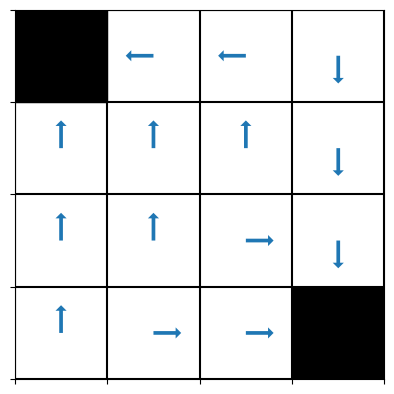

In [11]:
plot_policy(politer_policy)

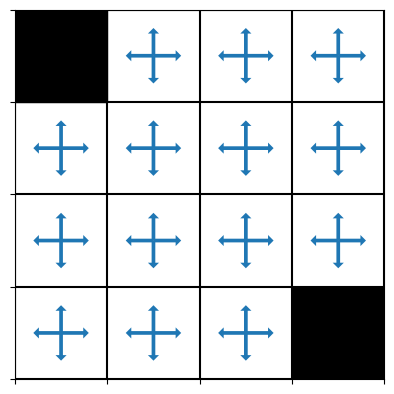

In [12]:
plot_policy(eq_policy)


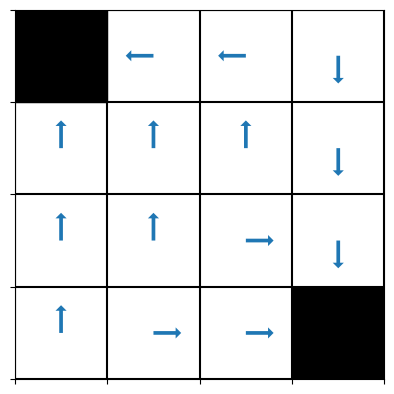

In [13]:
from policy_iteration import value_iteration
valiter_policy = value_iteration(grid_env, 0.1, 0.99)

plot_policy(valiter_policy)

In [14]:
from mc import mc_first_visit_policy_eval, mc_every_visit_policy_eval

val_mc_first_visit = mc_first_visit_policy_eval(grid_env, valiter_policy, 10000, 0.99)
val_mc_every_visit = mc_every_visit_policy_eval(grid_env, valiter_policy, 10000, 0.99)

C:\Users\slago\PycharmProjects\pyPlayground\rl\mc.py:60: RuntimeWarning: invalid value encountered in divide
  V = returns / n_visits
C:\Users\slago\PycharmProjects\pyPlayground\rl\mc.py:81: RuntimeWarning: invalid value encountered in divide
  V = returns / n_visits


In [15]:
val_mc_first_visit

array([    nan, -1.    , -1.99  , -2.9701, -1.    , -1.99  , -2.9701,
       -1.99  , -1.99  , -2.9701, -1.99  , -1.    , -2.9701, -1.99  ,
       -1.    ,     nan])

In [16]:
val_mc_every_visit

array([    nan, -1.    , -1.99  , -2.9701, -1.    , -1.99  , -2.9701,
       -1.99  , -1.99  , -2.9701, -1.99  , -1.    , -2.9701, -1.99  ,
       -1.    ,     nan])

In [17]:
from mc import mc_first_visit_eps_greedy_control

In [18]:
mc_policy, mc_Q = mc_first_visit_eps_greedy_control(grid_env, 1000, 0.1)


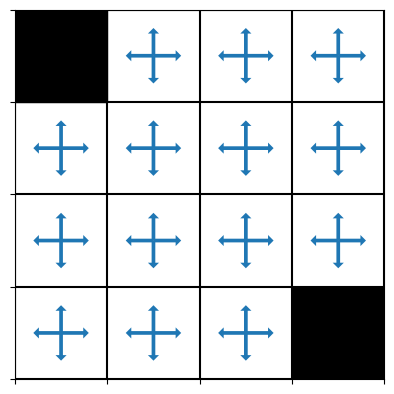

In [19]:
plot_policy(mc_policy)

In [20]:
mc_Q

array([[   0.        ,    0.        ,    0.        ,    0.        ],
       [  -2.4       ,  -42.        ,  -10.6       ,   -1.        ],
       [ -14.        ,  -93.        ,  -16.        ,   -2.59872611],
       [ -92.66666667,  -62.        ,  -87.33333333,   -5.83098592],
       [  -1.        ,  -47.4       ,  -60.6       , -141.5       ],
       [ -22.42857143,  -20.15      ,  -16.94117647,   -4.80681818],
       [ -34.77777778,   -6.4787234 , -101.        ,  -72.25      ],
       [ -55.4       ,  -46.6       ,   -2.43125   ,  -39.85714286],
       [-142.        , -110.        ,   -4.42553191,  -55.16666667],
       [ -14.9223301 ,  -22.46666667,  -20.27777778,  -27.21428571],
       [  -8.        ,   -2.01886792, -253.        ,  -68.        ],
       [  -4.5       ,   -2.375     ,   -1.        ,   -8.        ],
       [ -60.6       ,   -3.32098765,  -74.5       ,  -74.75      ],
       [ -65.6       ,   -3.28691983,  -50.5       ,  -39.375     ],
       [ -19.25      ,   -1.      

In [21]:
from mc import mc_off_policy_prediction

np.seterr(all='raise')
V = mc_off_policy_prediction(grid_env, eq_policy, valiter_policy, 1000, 1)

In [22]:
V

array([ 0., -1., -2., -3., -1., -2., -3., -2., -2., -3., -2., -1., -3.,
       -2., -1.,  0.])